

# 📝 Day 7 Problem: Movie Ratings & Revenue 🎬💰

### **Scenario**

You’re analyzing data from a streaming/movie platform. The dataset contains information about **movies, genres, release years, box office revenue, and average ratings**. Your task is to uncover trends in audience preferences and revenue patterns.

---

### **Step 1 – Dataset (Sample 10 Records)**

| Movie             | Genre     | Year | Revenue (M\$) | Rating |
| ----------------- | --------- | ---- | ------------- | ------ |
| Avengers: Endgame | Action    | 2019 | 2798          | 8.4    |
| Joker             | Drama     | 2019 | 1074          | 8.5    |
| Frozen II         | Animation | 2019 | 1450          | 6.9    |
| Inception         | Sci-Fi    | 2010 | 829           | 8.8    |
| Interstellar      | Sci-Fi    | 2014 | 677           | 8.6    |
| The Dark Knight   | Action    | 2008 | 1005          | 9.0    |
| Titanic           | Romance   | 1997 | 2200          | 7.8    |
| Avatar            | Sci-Fi    | 2009 | 2847          | 7.9    |
| The Lion King     | Animation | 2019 | 1656          | 6.8    |
| La La Land        | Romance   | 2016 | 446           | 8.0    |

---

### **Step 2 – Tasks**

1. Load dataset into Pandas.
2. Calculate:

   * Top 3 highest-grossing movies.
   * Average revenue per genre.
   * Year-wise average rating trend.
3. Use **NumPy** for calculations (mean, max, sorting).
4. Visualizations:

   * **Bar chart** → Revenue by genre.
   * **Line chart** → Average rating trend by year.
   * **Scatter plot** → Revenue vs. Rating (see if higher-rated movies earn more).

---

### **Step 3 – Expected Outcome**

* Insights into **blockbusters & audience favorites**.
* Trend of **ratings across years**.
* Relationship between **box office & audience ratings**.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("movies_data.csv")

In [3]:
df.head()

,Movie,Genre,Year,Revenue (M$),Rating
0,Avengers: Endgame,Action,2019,2798,8.4
1,Joker,Drama,2019,1074,8.5
2,Frozen II,Animation,2019,1450,6.9
3,Inception,Sci-Fi,2010,829,8.8
4,Interstellar,Sci-Fi,2014,677,8.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie         10 non-null     object 
 1   Genre         10 non-null     object 
 2   Year          10 non-null     int64  
 3   Revenue (M$)  10 non-null     int64  
 4   Rating        10 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes


In [5]:
top3_movies = df.nlargest(3, "Revenue (M$)")[["Movie", "Revenue (M$)"]]

In [6]:
top3_movies

,Movie,Revenue (M$)
7,Avatar,2847
0,Avengers: Endgame,2798
6,Titanic,2200


In [7]:
avg_revenue_genre = df.groupby("Genre")["Revenue (M$)"].mean()
avg_revenue_genre

Genre
Action       1901.5
Animation    1553.0
Drama        1074.0
Romance      1323.0
Sci-Fi       1451.0
Name: Revenue (M$), dtype: float64

In [10]:
avg_rating_year = df.groupby("Year")["Rating"].mean().sort_index()

(top3_movies, avg_revenue_genre, avg_rating_year)

(               Movie  Revenue (M$)
 7             Avatar          2847
 0  Avengers: Endgame          2798
 6            Titanic          2200,
 Genre
 Action       1901.5
 Animation    1553.0
 Drama        1074.0
 Romance      1323.0
 Sci-Fi       1451.0
 Name: Revenue (M$), dtype: float64,
 Year
 1997    7.80
 2008    9.00
 2009    7.90
 2010    8.80
 2014    8.60
 2016    8.00
 2019    7.65
 Name: Rating, dtype: float64)

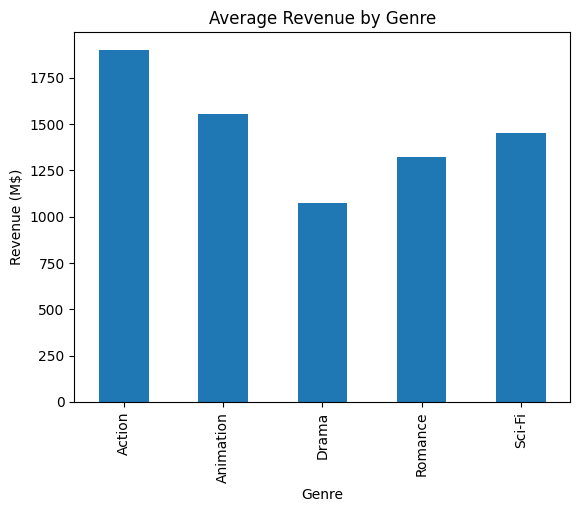

In [12]:
avg_revenue_genre.plot(kind="bar")
plt.title("Average Revenue by Genre")
plt.ylabel("Revenue (M$)")
plt.xlabel("Genre")
plt.show()


Text(0.5, 0, 'Year')

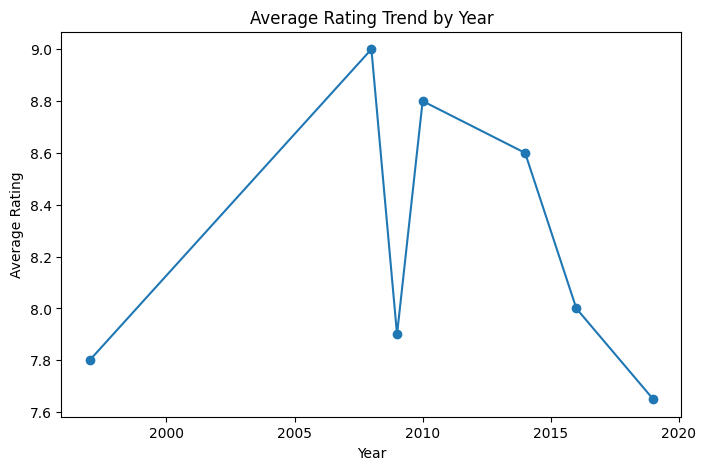

In [13]:
plt.figure(figsize=(8,5))
avg_rating_year.plot(kind="line", marker="o")
plt.title("Average Rating Trend by Year")
plt.ylabel("Average Rating")
plt.xlabel("Year")





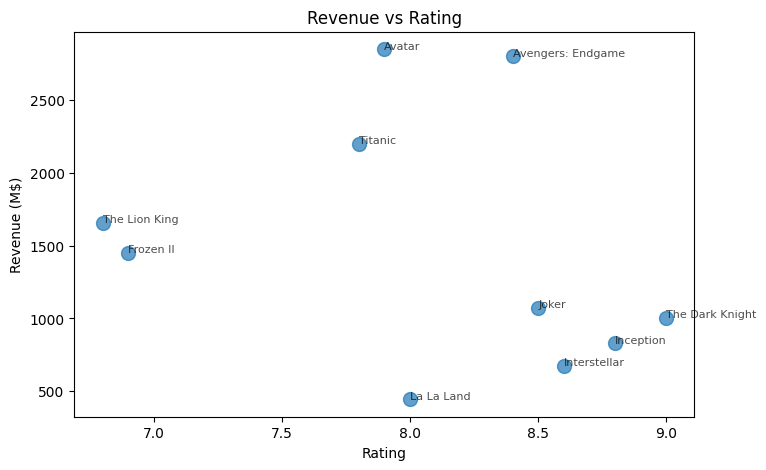

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(df["Rating"], df["Revenue (M$)"], s=100, alpha=0.7)
plt.title("Revenue vs Rating")
plt.xlabel("Rating")
plt.ylabel("Revenue (M$)")
for i, txt in enumerate(df["Movie"]):
    plt.annotate(txt, (df["Rating"][i], df["Revenue (M$)"][i]), fontsize=8, alpha=0.7)

plt.show()